# Wine and price analysis

In [2]:
# importo le librerie necessarie 
import numpy as np
import pandas as pd

%matplotlib inline 
import matplotlib   
import matplotlib.pyplot as plt
import seaborn as sns

### Pulizia e Modifica del DF 'W_red'

In [3]:
# leggo il mio file csv e lo inserico in una variabile denominata W_red
W_red = pd.read_csv('Wine Rating & Price/Red.csv')
W_red.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016


In [4]:
# Inserisco una nuova colonna che identifica la tipologia di vino 
W_red['Type of wine']= 'Red'

In [5]:
W_red.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type of wine
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,Red
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,Red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Red
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,Red
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,Red


In [6]:
#Ordino le colonne del Dataframe 
W_red = W_red[['Type of wine', 'Name', 'Winery', 'Country', 'Region', 'Rating', 'NumberOfRatings', 'Year', 'Price']]

In [7]:
W_red.head()

,Type of wine,Name,Winery,Country,Region,Rating,NumberOfRatings,Year,Price
0,Red,Pomerol 2011,Château La Providence,France,Pomerol,4.2,100,2011,95.00
1,Red,Lirac 2017,Château Mont-Redon,France,Lirac,4.3,100,2017,15.50
2,Red,Erta e China Rosso di Toscana 2015,Renzo Masi,Italy,Toscana,3.9,100,2015,7.45
3,Red,Bardolino 2019,Cavalchina,Italy,Bardolino,3.5,100,2019,8.72
4,Red,Ried Scheibner Pinot Noir 2016,Markowitsch,Austria,Carnuntum,3.9,100,2016,29.15


<AxesSubplot:>

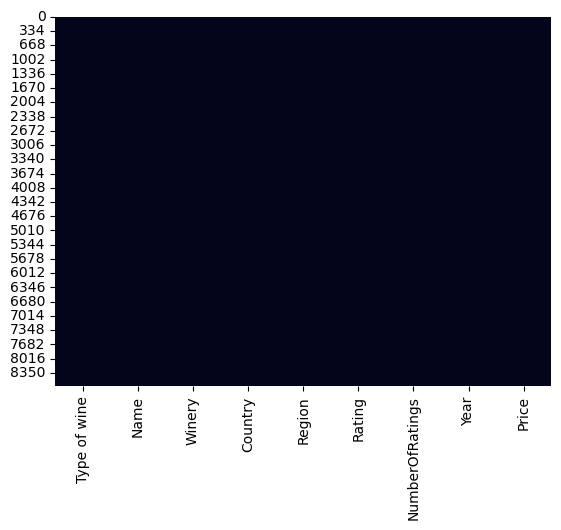

In [8]:
sns.heatmap(W_red.isna(), cbar=False)  

In [9]:
W_red.isna().sum()

Type of wine       0
Name               0
Winery             0
Country            0
Region             0
Rating             0
NumberOfRatings    0
Year               0
Price              0
dtype: int64

In [10]:
W_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type of wine     8666 non-null   object 
 1   Name             8666 non-null   object 
 2   Winery           8666 non-null   object 
 3   Country          8666 non-null   object 
 4   Region           8666 non-null   object 
 5   Rating           8666 non-null   float64
 6   NumberOfRatings  8666 non-null   int64  
 7   Year             8666 non-null   object 
 8   Price            8666 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 609.5+ KB


In [11]:
#Osservo se ci sono valori anomali prima di modificare Year 
print(W_red['Year'].unique())

['2011' '2017' '2015' '2019' '2016' '2014' '2013' '2018' '2012' '2010'
 '2007' '2005' '1999' '2002' '2008' '2006' '2009' 'N.V.' '2000' '2004'
 '2001' '1996' '1998' '1990' '1995' '2003' '1993' '1988' '1989' '1997'
 '1992' '1991']


In [12]:
# Rimuovo il 'N.V' sostituendolo con un 0, e modifico il Dtype come un 'int'
W_red["Year"] = W_red["Year"].fillna(0)
W_red['Year']= W_red['Year'].replace("\D+","0",regex=True).astype('int32')
print(W_red['Year'].unique())

[2011 2017 2015 2019 2016 2014 2013 2018 2012 2010 2007 2005 1999 2002
 2008 2006 2009    0 2000 2004 2001 1996 1998 1990 1995 2003 1993 1988
 1989 1997 1992 1991]


In [13]:
# Capire se posso sosituire i Valori della colonna Year da 0 a un valore mediano!!
condition  = (W_red['Year'] == 0 )
W_red.loc[condition, 'Year'] = W_red['Year'].median()
print(W_red['Year'].unique())

[2011 2017 2015 2019 2016 2014 2013 2018 2012 2010 2007 2005 1999 2002
 2008 2006 2009 2000 2004 2001 1996 1998 1990 1995 2003 1993 1988 1989
 1997 1992 1991]


In [14]:
W_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type of wine     8666 non-null   object 
 1   Name             8666 non-null   object 
 2   Winery           8666 non-null   object 
 3   Country          8666 non-null   object 
 4   Region           8666 non-null   object 
 5   Rating           8666 non-null   float64
 6   NumberOfRatings  8666 non-null   int64  
 7   Year             8666 non-null   int32  
 8   Price            8666 non-null   float64
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 575.6+ KB


### Pulizia e Modifica del DF 'W_rose'

In [15]:
# leggo il mio file csv e lo inserico in una variabile denominata W_rose
W_rose = pd.read_csv('Wine Rating & Price/Rose.csv')
W_rose.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Mad Méditerranée Rosé 2019,France,Méditerranée,Château Camparnaud,4.0,25,10.11,2019
1,Redoma Rosé 2019,Portugal,Douro,Niepoort,3.9,25,12.81,2019
2,Fantini Cerasuolo d'Abruzzo 2019,Italy,Abruzzo,Farnese,3.6,25,5.60,2019
3,Mount Hermon Rosé 2017,Israel,Galilee,Hermon,3.4,25,12.14,2017
4,La Villa Rosé 2018,France,Languedoc,Château La Sauvageonne,4.6,25,68.95,2018


In [16]:
# Inserisco una nuova colonna che identifica la tipologia di vino 
W_rose['Type of wine']= 'Rose'

In [17]:
#Ordino le colonne del Dataframe 
W_rose = W_rose[['Type of wine', 'Name', 'Winery', 'Country', 'Region', 'Rating', 'NumberOfRatings', 'Year', 'Price']]

In [18]:
W_rose.head()

,Type of wine,Name,Winery,Country,Region,Rating,NumberOfRatings,Year,Price
0,Rose,Mad Méditerranée Rosé 2019,Château Camparnaud,France,Méditerranée,4.0,25,2019,10.11
1,Rose,Redoma Rosé 2019,Niepoort,Portugal,Douro,3.9,25,2019,12.81
2,Rose,Fantini Cerasuolo d'Abruzzo 2019,Farnese,Italy,Abruzzo,3.6,25,2019,5.60
3,Rose,Mount Hermon Rosé 2017,Hermon,Israel,Galilee,3.4,25,2017,12.14
4,Rose,La Villa Rosé 2018,Château La Sauvageonne,France,Languedoc,4.6,25,2018,68.95


<AxesSubplot:>

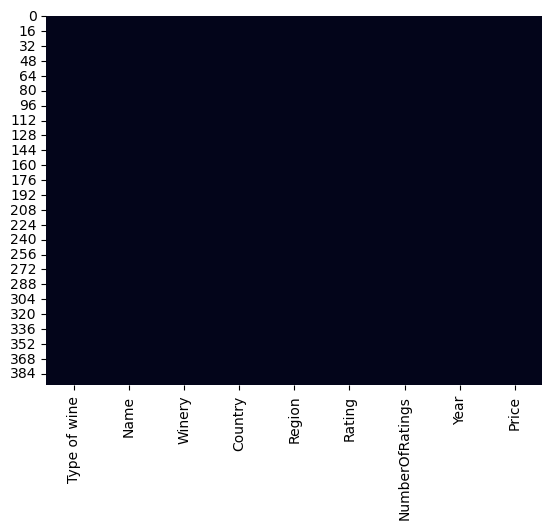

In [19]:
# ho usato un Heatmap per visualizzare tutti i record NaN
sns.heatmap(W_rose.isna(), cbar=False)  

In [20]:
W_rose.isna().sum()

Type of wine       0
Name               0
Winery             0
Country            0
Region             0
Rating             0
NumberOfRatings    0
Year               0
Price              0
dtype: int64

In [21]:
W_rose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type of wine     397 non-null    object 
 1   Name             397 non-null    object 
 2   Winery           397 non-null    object 
 3   Country          397 non-null    object 
 4   Region           397 non-null    object 
 5   Rating           397 non-null    float64
 6   NumberOfRatings  397 non-null    int64  
 7   Year             397 non-null    object 
 8   Price            397 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 28.0+ KB


In [22]:
#Osservo se ci sono valori anomali prima di modificare Year 
print(W_rose['Year'].unique())

['2019' '2017' '2018' '2013' '2016' '2015' '2012' '2014' 'N.V.']


In [23]:
# Rimuovo il 'N.V' sostituendolo con un 0, e modifico il Dtype come un 'int'
W_rose["Year"] = W_rose["Year"].fillna(0)
W_rose['Year']= W_rose['Year'].replace("\D+","0",regex=True).astype('int32')
print(W_rose['Year'].unique())

[2019 2017 2018 2013 2016 2015 2012 2014    0]


In [24]:
# Capire se posso sosituire i Valori della colonna Year da 0 a un valore mediano!!
condition  = (W_rose['Year'] == 0 )
W_rose.loc[condition, 'Year'] = W_rose['Year'].median()
print(W_rose['Year'].unique())

[2019 2017 2018 2013 2016 2015 2012 2014]


In [25]:
W_rose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type of wine     397 non-null    object 
 1   Name             397 non-null    object 
 2   Winery           397 non-null    object 
 3   Country          397 non-null    object 
 4   Region           397 non-null    object 
 5   Rating           397 non-null    float64
 6   NumberOfRatings  397 non-null    int64  
 7   Year             397 non-null    int32  
 8   Price            397 non-null    float64
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 26.5+ KB


### Pulizia e Modifica del DF 'W_white'

In [26]:
# leggo il mio file csv e lo inserico in una variabile denominata W_rose
W_white = pd.read_csv('Wine Rating & Price/White.csv')
W_white.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Vermentino 2017,Italy,Toscana,Famiglia Castellani,3.8,25,5.65,2017
1,Ronco Broilo 2010,Italy,Colli Orientali del Friuli,Conte d'Attimis Maniago,4.3,25,44.90,2010
2,Weisser Schiefer s 2017,Austria,Südburgenland,Weinbau Uwe Schiefer,4.2,25,33.25,2017
3,Chardonnay 2018,Germany,Rheinhessen,Krämer - Straight,3.9,25,8.99,2018
4,Maganza Zibibbo 2018,Italy,Terre Siciliane,Luna Gaia,3.9,25,8.60,2018


In [27]:
# Inserisco una nuova colonna che identifica la tipologia di vino 
W_white['Type of wine']= 'White'

In [28]:
#Ordino le colonne del Dataframe 
W_white = W_white[['Type of wine', 'Name', 'Winery', 'Country', 'Region', 'Rating', 'NumberOfRatings', 'Year', 'Price']]

In [29]:
W_white.head()

,Type of wine,Name,Winery,Country,Region,Rating,NumberOfRatings,Year,Price
0,White,Vermentino 2017,Famiglia Castellani,Italy,Toscana,3.8,25,2017,5.65
1,White,Ronco Broilo 2010,Conte d'Attimis Maniago,Italy,Colli Orientali del Friuli,4.3,25,2010,44.90
2,White,Weisser Schiefer s 2017,Weinbau Uwe Schiefer,Austria,Südburgenland,4.2,25,2017,33.25
3,White,Chardonnay 2018,Krämer - Straight,Germany,Rheinhessen,3.9,25,2018,8.99
4,White,Maganza Zibibbo 2018,Luna Gaia,Italy,Terre Siciliane,3.9,25,2018,8.60


<AxesSubplot:>

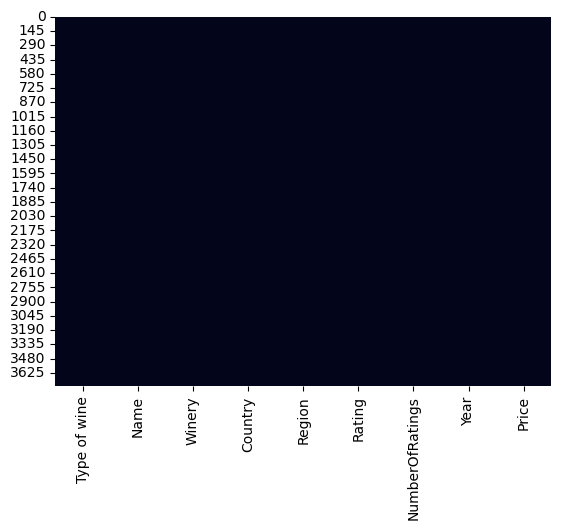

In [30]:
# ho usato un Heatmap per visualizzare tutti i record NaN
sns.heatmap(W_white.isna(), cbar=False)  

In [31]:
W_white.isna().sum()

Type of wine       0
Name               0
Winery             0
Country            0
Region             0
Rating             0
NumberOfRatings    0
Year               0
Price              0
dtype: int64

In [32]:
W_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3764 entries, 0 to 3763
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type of wine     3764 non-null   object 
 1   Name             3764 non-null   object 
 2   Winery           3764 non-null   object 
 3   Country          3764 non-null   object 
 4   Region           3764 non-null   object 
 5   Rating           3764 non-null   float64
 6   NumberOfRatings  3764 non-null   int64  
 7   Year             3764 non-null   object 
 8   Price            3764 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 264.8+ KB


In [33]:
#Osservo se ci sono valori anomali prima di modificare Year 
print(W_white['Year'].unique())

['2017' '2010' '2018' '2019' '2016' '2015' '2014' '2013' '2012' '2007'
 '2011' '1999' '2006' '2003' '2004' '1998' '2020' '2005' '1993' 'N.V.'
 '2009' '2008']


In [34]:
# Rimuovo il 'N.V' sostituendolo con un 0, e modifico il Dtype come un 'int'
W_white["Year"] = W_white["Year"].fillna(0)
W_white['Year']= W_white['Year'].replace("\D+","0",regex=True).astype('int32')
print(W_white['Year'].unique())

[2017 2010 2018 2019 2016 2015 2014 2013 2012 2007 2011 1999 2006 2003
 2004 1998 2020 2005 1993    0 2009 2008]


In [35]:
# Capire se posso sosituire i Valori della colonna Year da 0 a un valore mediano!!
condition  = (W_white['Year'] == 0 )
W_white.loc[condition, 'Year'] = W_white['Year'].median()
print(W_white['Year'].unique())

[2017 2010 2018 2019 2016 2015 2014 2013 2012 2007 2011 1999 2006 2003
 2004 1998 2020 2005 1993 2009 2008]


In [36]:
W_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3764 entries, 0 to 3763
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type of wine     3764 non-null   object 
 1   Name             3764 non-null   object 
 2   Winery           3764 non-null   object 
 3   Country          3764 non-null   object 
 4   Region           3764 non-null   object 
 5   Rating           3764 non-null   float64
 6   NumberOfRatings  3764 non-null   int64  
 7   Year             3764 non-null   int32  
 8   Price            3764 non-null   float64
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 250.1+ KB


### Pulizia e Modifica del DF 'W_sparkling'

In [37]:
# leggo il mio file csv e lo inserico in una variabile denominata W_rose
W_sparkling = pd.read_csv('Wine Rating & Price/Sparkling.csv')
W_sparkling.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Crémant de Loire Brut 2017,France,Crémant de Loire,Langlois-Chateau,3.9,25,14.41,2017
1,Vicar's Choice Sauvignon Blanc Bubbles 2019,New Zealand,Marlborough,Saint Clair,4.2,25,11.90,2019
2,Crémant de Limoux Brut N.V.,France,Crémant de Limoux,Prima Perla,3.5,25,14.32,N.V.
3,Athesis Brut 2016,Italy,Südtirol - Alto Adige,Kettmeir,4.0,25,21.50,2016
4,Blanc de Blancs Réserve Brut Nature N.V.,Germany,Pfalz,Eymann,3.9,25,31.18,N.V.


In [38]:
# Inserisco una nuova colonna che identifica la tipologia di vino 
W_sparkling['Type of wine']= 'Sparkling'

In [39]:
#Ordino le colonne del Dataframe 
W_sparkling = W_sparkling[['Type of wine', 'Name', 'Winery', 'Country', 'Region', 'Rating', 'NumberOfRatings', 'Year', 'Price']]

<AxesSubplot:>

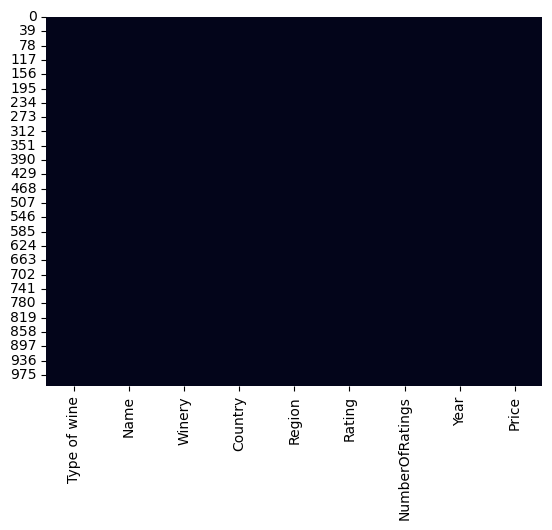

In [40]:
# ho usato un Heatmap per visualizzare tutti i record NaN
sns.heatmap(W_sparkling.isna(), cbar=False)  

In [41]:
W_sparkling.isna().sum()

Type of wine       0
Name               0
Winery             0
Country            0
Region             0
Rating             0
NumberOfRatings    0
Year               0
Price              0
dtype: int64

In [42]:
#Osservo se ci sono valori anomali prima di modificare Year 
print(W_sparkling['Year'].unique())

['2017' '2019' 'N.V.' '2016' '2015' '2012' '2007' '2011' '2008' '2010'
 '2013' '2018' '2014' '1961' '2005' '2006' '2009' '2004' '2003' '2002'
 '1999' '1996']


In [43]:
# Rimuovo il 'N.V' sostituendolo con un 0, e modifico il Dtype come un 'int'
W_sparkling["Year"] = W_sparkling["Year"].fillna(0)
W_sparkling['Year']= W_sparkling['Year'].replace("\D+","0",regex=True).astype('int32')
print(W_sparkling['Year'].unique())

[2017 2019    0 2016 2015 2012 2007 2011 2008 2010 2013 2018 2014 1961
 2005 2006 2009 2004 2003 2002 1999 1996]


In [44]:
# Capire se posso sosituire i Valori della colonna Year da 0 a un valore mediano!!
condition  = (W_sparkling['Year'] == 0)
W_sparkling.loc[condition, 'Year'] = W_sparkling['Year'].median()
print(W_sparkling['Year'].unique()) 

[2017 2019    0 2016 2015 2012 2007 2011 2008 2010 2013 2018 2014 1961
 2005 2006 2009 2004 2003 2002 1999 1996]


In [45]:
W_sparkling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type of wine     1007 non-null   object 
 1   Name             1007 non-null   object 
 2   Winery           1007 non-null   object 
 3   Country          1007 non-null   object 
 4   Region           1007 non-null   object 
 5   Rating           1007 non-null   float64
 6   NumberOfRatings  1007 non-null   int64  
 7   Year             1007 non-null   int32  
 8   Price            1007 non-null   float64
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 67.0+ KB


### Unione dei DataFrame e Analisi

In [46]:
dfs = [W_red, W_white, W_rose, W_sparkling]

# crea un dataframe vuoto per contenere il risultato
Wine_df = pd.DataFrame()

# uso un ciclo for per concatenare i dataframe uno alla volta
for df in dfs:
    Wine_df = pd.concat([Wine_df, df])

# stampa il risultato
Wine_df.head()

,Type of wine,Name,Winery,Country,Region,Rating,NumberOfRatings,Year,Price
0,Red,Pomerol 2011,Château La Providence,France,Pomerol,4.2,100,2011,95.00
1,Red,Lirac 2017,Château Mont-Redon,France,Lirac,4.3,100,2017,15.50
2,Red,Erta e China Rosso di Toscana 2015,Renzo Masi,Italy,Toscana,3.9,100,2015,7.45
3,Red,Bardolino 2019,Cavalchina,Italy,Bardolino,3.5,100,2019,8.72
4,Red,Ried Scheibner Pinot Noir 2016,Markowitsch,Austria,Carnuntum,3.9,100,2016,29.15


In [47]:
Wine_df.shape

(13834, 9)

In [48]:
Wine_df.Country.unique()

array(['France', 'Italy', 'Austria', 'New Zealand', 'Chile', 'Australia',
       'South Africa', 'Spain', 'United States', 'Portugal', 'Hungary',
       'Brazil', 'Argentina', 'Romania', 'Germany', 'Greece', 'Mexico',
       'Moldova', 'Switzerland', 'Slovenia', 'Israel', 'Georgia',
       'Lebanon', 'Uruguay', 'Turkey', 'Croatia', 'China', 'Slovakia',
       'Bulgaria', 'Canada', 'Luxembourg', 'Czech Republic',
       'United Kingdom'], dtype=object)

#### Analisi sul Rating

In [51]:
#Tipologie di Vino e relativi calcoli applicati sul Rating
Wine_df.groupby("Type of wine")["Rating"].agg(['count','sum','mean','min','max']).reset_index(drop=False)

,Type of wine,count,sum,mean,min,max
0,Red,8666,33713.7,3.890342,2.5,4.8
1,Rose,397,1485.3,3.741310,2.7,4.8
2,Sparkling,1007,3908.0,3.880834,3.2,4.7
3,White,3764,14370.6,3.817906,2.2,4.9


In [98]:
#Paese che ha la somma di valutazioni più alte
rating_wine_region= Wine_df.groupby('Country')['Rating'].sum().reset_index(drop=False)
rating_wine_region.sort_values(by='Rating', ascending=False).head(7)

,Country,Rating
16,Italy,15206.6
10,France,13513.2
27,Spain,5840.6
12,Germany,4753.5
26,South Africa,3216.7
31,United States,2060.8
2,Austria,1877.3


In [ ]:
# Tipi di Vino e Punteggio più alto
result_white = Wine_df.loc[(Wine_df['Type of wine'] == 'White') & (Wine_df['Rating'] >= 4.5), ['Type of wine', 'Name','Rating']]
result_white.sort_values(by='Rating', ascending=False)

,Type of wine,Name,Rating
541,White,Montrachet Grand Cru Marquis de Laguiche 2017,4.9
1010,White,Ermitage de l'Orée 2004,4.8
1207,White,The Wine Collection Sauvignon 2016,4.7
493,White,Bâtard-Montrachet Grand Cru 2015,4.6
2709,White,Vieilles Vignes Châteauneuf-du-Pape Blanc 2014,4.6
1986,White,Corton-Charlemagne Grand Cru 2015,4.6
2120,White,Kirchspiel Riesling GG 2015,4.6
1209,White,Zeltinger Schlossberg Riesling Trockenbeerenau...,4.6
2486,White,Kirchspiel Riesling GG 2012,4.6
1765,White,Wehlener Sonnenuhr Riesling Auslese 2015,4.6


In [97]:
# Vino e Punteggio più alto
result_rose = Wine_df.loc[(Wine_df['Type of wine'] == 'Rose') & (Wine_df['Rating'] >= 4.5), ['Type of wine', 'Name','Rating']]
result_rose.sort_values(by='Rating', ascending=False)

,Type of wine,Name,Rating
77,Rose,Garrus Rosé 2018,4.8
4,Rose,La Villa Rosé 2018,4.6
48,Rose,Clos Beylesse Côtes de Provence Rosé 2019,4.5
54,Rose,281 Rosé 2019,4.5
140,Rose,Clos du Temple 2018,4.5


In [ ]:
# Vino e Punteggio più alto
result_red = Wine_df.loc[(Wine_df['Type of wine'] == 'Red') & (Wine_df['Rating'] >= 4.5), ['Type of wine', 'Name','Rating']]
result_red.sort_values(by='Rating', ascending=False)

,Type of wine,Name,Rating
3747,Red,Beckstoffer Las Piedras Vineyard Cabernet Sauv...,4.8
3420,Red,G 2015,4.8
4031,Red,L'Ermita Velles Vinyes Priorat 2008,4.8
951,Red,Barolo Riserva Monfortino 2013,4.8
8086,Red,Veneto Alzero Cabernet 2009,4.8
...,...,...,...
1680,Red,Tenuta Guado al Tasso Bolgheri Superiore 2015,4.5
5135,Red,Pomerol 2010,4.5
1646,Red,Brunello di Montalcino 2010,4.5
5197,Red,Brunello di Montalcino 2015,4.5


In [98]:
# Vino e Punteggio più alto
result_sparkling = Wine_df.loc[(Wine_df['Type of wine'] == 'Sparkling') & (Wine_df['Rating'] >= 4.5), ['Type of wine', 'Name','Rating']]
result_sparkling.sort_values(by='Rating', ascending=False)

,Type of wine,Name,Rating
87,Sparkling,Cristal Rosé Brut Champagne (Millésimé) 2012,4.7
892,Sparkling,Cristal Brut Champagne (Millésimé) 2002,4.7
700,Sparkling,Cristal Rosé Brut Champagne (Millésimé) 2007,4.6
990,Sparkling,Grande Cuvée Brut Champagne N.V.,4.6
973,Sparkling,Brut Champagne 2008,4.6
910,Sparkling,Cristal Brut Champagne (Millésimé) 2007,4.6
898,Sparkling,Cristal Brut Champagne (Millésimé) 2008,4.6
885,Sparkling,Cristal Brut Champagne (Millésimé) 2005,4.6
884,Sparkling,Brut Rosé Champagne N.V.,4.6
862,Sparkling,Brut Champagne 2004,4.6


In [106]:
# Solo i 4 tipi di Vino che hanno il Rating piu alto
types_of_wine = ['Red', 'White', 'Sparkling', 'Rose']

# Inizializza un dataframe vuoto
result_df = pd.DataFrame(columns=['Type of wine', 'Name', 'Rating'])

# Per ogni tipo di vino, seleziona le righe corrispondenti, ordina per rating e seleziona il primo elemento
for wine_type in types_of_wine:
    filtered_df = Wine_df[Wine_df['Type of wine'] == wine_type]
    sorted_df = filtered_df.sort_values(by='Rating', ascending=False)
    top_rated_wine = sorted_df.iloc[0][['Type of wine', 'Name', 'Rating']]
    result_df = result_df.append(top_rated_wine, ignore_index=True)

# Visualizza i risultati
result_df

C:\Users\leona\AppData\Local\Temp\ipykernel_29156\3739624752.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(top_rated_wine, ignore_index=True)
C:\Users\leona\AppData\Local\Temp\ipykernel_29156\3739624752.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(top_rated_wine, ignore_index=True)
C:\Users\leona\AppData\Local\Temp\ipykernel_29156\3739624752.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(top_rated_wine, ignore_index=True)
C:\Users\leona\AppData\Local\Temp\ipykernel_29156\3739624752.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

,Type of wine,Name,Rating
0,Red,G 2015,4.8
1,White,Montrachet Grand Cru Marquis de Laguiche 2017,4.9
2,Sparkling,Cristal Rosé Brut Champagne (Millésimé) 2012,4.7
3,Rose,Garrus Rosé 2018,4.8


#### Analisi sul Prezzo

In [56]:
#Groupby su Price per osservare quali sono Type of wine più o meno costosi
Wine_df.groupby("Type of wine")["Price"].agg(['count','sum','mean','min','max']).reset_index(drop=False)

,Type of wine,count,sum,mean,min,max
0,Red,8666,339231.13,39.145065,3.55,3410.79
1,Rose,397,4972.72,12.525743,3.67,249.00
2,Sparkling,1007,35047.05,34.803426,3.15,495.00
3,White,3764,77614.88,20.620319,3.74,681.37


In [105]:
# Solo i 4 tipi di Vino che hanno il Price piu alto
types_of_wine = ['Red', 'White', 'Sparkling', 'Rose']

# Inizializza un dataframe vuoto
result_df = pd.DataFrame(columns=['Type of wine', 'Name', 'Price'])

# Per ogni tipo di vino, seleziona le righe corrispondenti, ordina per rating e seleziona il primo elemento
for wine_type in types_of_wine:
    filtered_df = Wine_df[Wine_df['Type of wine'] == wine_type]
    sorted_df = filtered_df.sort_values(by='Price', ascending=False)
    top_rated_wine = sorted_df.iloc[0][['Type of wine', 'Name', 'Price']]
    result_df = result_df.append(top_rated_wine, ignore_index=True)

# Visualizza i risultati
result_df

C:\Users\leona\AppData\Local\Temp\ipykernel_29156\1605312358.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(top_rated_wine, ignore_index=True)
C:\Users\leona\AppData\Local\Temp\ipykernel_29156\1605312358.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(top_rated_wine, ignore_index=True)
C:\Users\leona\AppData\Local\Temp\ipykernel_29156\1605312358.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(top_rated_wine, ignore_index=True)
C:\Users\leona\AppData\Local\Temp\ipykernel_29156\1605312358.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

,Type of wine,Name,Price
0,Red,Pomerol 2012,3410.79
1,White,Montrachet Grand Cru Marquis de Laguiche 2017,681.37
2,Sparkling,Cristal Rosé Brut Champagne (Millésimé) 2007,495.00
3,Rose,Clos du Temple 2018,249.00


In [103]:
#Il vino più caro  (venduto) a livello Mondiale 
best_wine_price= Wine_df.groupby(['Type of wine','Name', 'Country','Region','NumberOfRatings','Rating'])['Price'].sum().astype(int).reset_index(drop=False)
best_wine_price.sort_values(by='Price', ascending=False).head(1)

,Type of wine,Name,Country,Region,NumberOfRatings,Rating,Price
5850,Red,Pomerol 2012,France,Pomerol,204,4.7,3410


In [73]:
#Il vino meno caro (venduto) a livello Mondiale 
best_wine_price= Wine_df.groupby(['Type of wine','Name', 'Country','Region','NumberOfRatings','Rating'])['Price'].sum().astype(int).reset_index(drop=False)
best_wine_price.sort_values(by='Price').head(1)

,Type of wine,Name,Country,Region,NumberOfRatings,Rating,Price
9569,Sparkling,Frizzantino Dolce N.V.,Italy,Emilia,43,4.2,3


#### Analisi sulle Vendite

In [50]:
#Paese con il numero di Acquisti più alto
price_wine_region= Wine_df.groupby('Country')['NumberOfRatings'].sum().reset_index(drop=False)
price_wine_region.sort_values(by='NumberOfRatings', ascending=False).head(7)

,Country,NumberOfRatings
10,France,1843284
16,Italy,1553251
27,Spain,728939
31,United States,420758
6,Chile,240761
0,Argentina,239990
22,Portugal,236578


In [99]:
#Vini piu acquistati/recensiti(NumberOfRatings)
wine_n_rating= Wine_df.groupby(['Type of wine','Name','Country','Region','Price'])['NumberOfRatings'].sum().reset_index(drop=False)
wine_n_rating.sort_values(by='NumberOfRatings', ascending=False).head(10)

,Type of wine,Name,Country,Region,Price,NumberOfRatings
9172,Sparkling,Brut Champagne N.V.,France,Champagne,170.00,94287
9142,Sparkling,Brut (Carte Jaune) Champagne N.V.,France,Champagne,43.60,86839
9589,Sparkling,Impérial Brut Champagne N.V.,France,Champagne,40.61,76037
13543,White,Vinho Verde Branco N.V.,Portugal,Vinho Verde,4.35,62980
9204,Sparkling,Brut Premier Champagne N.V.,France,Champagne Premier Cru,36.48,40004
9936,Sparkling,Special Cuvée Brut Aÿ Champagne N.V.,France,Champagne,46.00,37765
9145,Sparkling,Brut (Réserve) Champagne N.V.,France,Champagne,35.90,30090
8994,Rose,The Original Rosé N.V.,Portugal,Douro,5.99,29531
9549,Sparkling,Grand Brut Champagne N.V.,France,Champagne Grand Cru,43.69,26726
9176,Sparkling,Brut Cuvée Champagne Rosé N.V.,France,Champagne,69.00,23316


In [71]:
#Vini meno acquistati/recensiti(NumberOfRatings)
wine_n_rating= Wine_df.groupby(['Type of wine','Name','Country','Region','Price'])['NumberOfRatings'].sum().reset_index(drop=False)
wine_n_rating.sort_values(by='NumberOfRatings').head(10)

,Type of wine,Name,Country,Region,Price,NumberOfRatings
11183,White,Fehérburgundi 2017,Hungary,Sopron,11.02,25
8818,Rose,Mea Rosa 2019,Italy,Liguria,11.45,25
13411,White,Unterebner Pinot Grigio 2018,Italy,Südtirol - Alto Adige,20.37,25
13112,White,Schlossberg 2017,Germany,Rheingau,27.78,25
12801,White,Safari Pecorino 2017,Italy,Terre di Chieti,6.74,25
8623,Red,È Arte Primitivo 2018,Italy,Puglia,5.90,25
11002,White,Deep Blue 2018,Germany,Nahe,10.90,25
13114,White,Schlossberg Achkarren Grauburgunder GG 2016,Germany,Baden,28.00,25
1537,Red,Camy Madiran 2014,France,Madiran,12.57,25
10437,White,Catarratto 2019,Italy,Terre Siciliane,5.00,25


In [102]:
#I vini più Venduti con le valutazione (stelline) più alte
best_wine_region= Wine_df.groupby(['Type of wine','Name', 'Country','Region','NumberOfRatings'])['Rating'].mean().astype(int).reset_index(drop=False)
best_wine_region.sort_values(by='NumberOfRatings', ascending=False).head()         

,Type of wine,Name,Country,Region,NumberOfRatings,Rating
9189,Sparkling,Brut Champagne N.V.,France,Champagne,94287,4
9159,Sparkling,Brut (Carte Jaune) Champagne N.V.,France,Champagne,86839,4
9607,Sparkling,Impérial Brut Champagne N.V.,France,Champagne,76037,4
13562,White,Vinho Verde Branco N.V.,Portugal,Vinho Verde,62980,3
9221,Sparkling,Brut Premier Champagne N.V.,France,Champagne Premier Cru,40004,4


#### Analisi sulla Valutazione Rating/Price (Convenienza)

In [ ]:
'''Valutazione Rating / Price
Si cerca di capire quanto valore si ottiene per il prezzo che paghi per il vino.
Questo valore può essere utile per i consumatori di vino che cercano di bilanciare la qualità del vino con il suo prezzo.
Inoltre, questo rapporto può aiutare i produttori di vino a capire come i loro prodotti sono valutati rispetto al prezzo che richiedono,
e se sono competitivi sul mercato in te
'''

In [75]:
# Nuova colonna che calcola il rapporto tra Price e Rating
Wine_df["Rating Price Ratio"] = Wine_df["Rating"] / Wine_df["Price"]
Wine_df.head()

,Type of wine,Name,Winery,Country,Region,Rating,NumberOfRatings,Year,Price,Rating Price Ratio
0,Red,Pomerol 2011,Château La Providence,France,Pomerol,4.2,100,2011,95.00,0.044211
1,Red,Lirac 2017,Château Mont-Redon,France,Lirac,4.3,100,2017,15.50,0.277419
2,Red,Erta e China Rosso di Toscana 2015,Renzo Masi,Italy,Toscana,3.9,100,2015,7.45,0.523490
3,Red,Bardolino 2019,Cavalchina,Italy,Bardolino,3.5,100,2019,8.72,0.401376
4,Red,Ried Scheibner Pinot Noir 2016,Markowitsch,Austria,Carnuntum,3.9,100,2016,29.15,0.133791


In [76]:
#Trovare i massimi valori della colonna "rating_price_ratio".
Wine_df.sort_values(by='Rating Price Ratio', ascending=False).head()

,Type of wine,Name,Winery,Country,Region,Rating,NumberOfRatings,Year,Price,Rating Price Ratio
100,Sparkling,Frizzantino Dolce N.V.,Gualtieri,Italy,Emilia,4.2,43,0,3.15,1.333333
261,Sparkling,Lambrusco dell’Emilia Dolce N.V.,Gualtieri,Italy,Emilia,3.8,106,0,3.15,1.206349
379,Rose,Lambrusco Emilia Rosé N.V.,Riunite,Italy,Emilia,4.0,669,2018,3.67,1.089918
6408,Red,Nero d'Avola 2018,Monte Pietroso,Italy,Terre Siciliane,3.8,56,2018,3.79,1.002639
340,White,Bianco 2018,Monte Pietroso,Italy,Terre Siciliane,3.7,30,2018,3.79,0.976253


In [90]:
# creo dei bin dove idati con valori compresi tra 0.0 e 0.3 saranno assegnati al primo bin, 
#i dati compresi tra 0.3 e 0.6 saranno assegnati al secondo bin, 
#i dati con valori compresi tra 0.6 e 1.33 saranno assegnati al terzo bin.
bins = [0.0, 0.3, 0.6, 1.4]

In [91]:
# Creo una nuova colonna "Rating category" che mi permette di creare dei valori "Excellent", "Medium" o "Poor" in base al rating
Wine_df['Rating category'] = pd.cut(Wine_df['Rating Price Ratio'], bins=bins , labels=['Low', 'Medium', 'Excellent'])
Wine_df.head(10)   #i quantili megli farli sul Rating o sul rating price Ratio?????

,Type of wine,Name,Winery,Country,Region,Rating,NumberOfRatings,Year,Price,Rating Price Ratio,Rating category
0,Red,Pomerol 2011,Château La Providence,France,Pomerol,4.2,100,2011,95.00,0.044211,Low
1,Red,Lirac 2017,Château Mont-Redon,France,Lirac,4.3,100,2017,15.50,0.277419,Low
2,Red,Erta e China Rosso di Toscana 2015,Renzo Masi,Italy,Toscana,3.9,100,2015,7.45,0.523490,Medium
3,Red,Bardolino 2019,Cavalchina,Italy,Bardolino,3.5,100,2019,8.72,0.401376,Medium
4,Red,Ried Scheibner Pinot Noir 2016,Markowitsch,Austria,Carnuntum,3.9,100,2016,29.15,0.133791,Low
5,Red,Gigondas (Nobles Terrasses) 2017,Vieux Clocher,France,Gigondas,3.7,100,2017,19.90,0.185930,Low
6,Red,Marion's Vineyard Pinot Noir 2016,Schubert,New Zealand,Wairarapa,4.0,100,2016,43.87,0.091178,Low
7,Red,Red Blend 2014,Viña La Causa,Chile,Itata Valley,3.9,100,2014,17.52,0.222603,Low
8,Red,Chianti 2015,Castello Montaùto,Italy,Chianti,3.6,100,2015,10.75,0.334884,Medium
9,Red,Tradition 2014,Domaine des Aires Hautes,France,Minervois,3.5,100,2014,6.90,0.507246,Medium


In [92]:
# Il miglior Vino Rating - Price
sorted_data = Wine_df.sort_values(by='Rating Price Ratio', ascending=False)
best_wine = sorted_data.iloc[0]
best_wine

Type of wine                       Sparkling
Name                  Frizzantino Dolce N.V.
Winery                             Gualtieri
Country                                Italy
Region                                Emilia
Rating                                   4.2
NumberOfRatings                           43
Year                                       0
Price                                   3.15
Rating Price Ratio                  1.333333
Rating category                    Excellent
Name: 100, dtype: object

In [100]:
# Il peggior Vino Rating - Price
sorted_data = Wine_df.sort_values(by='Rating Price Ratio')
worst_wine_rp = sorted_data.iloc[0]
worst_wine_rp

Type of wine                   Red
Name                  Pomerol 2012
Winery                      Pétrus
Country                     France
Region                     Pomerol
Rating                         4.7
NumberOfRatings                204
Year                          2012
Price                      3410.79
Rating Price Ratio        0.001378
Rating category                Low
Name: 2344, dtype: object

In [101]:
# conto il numero di tipi di vino con rating "Excellent"
num_excellent = (Wine_df['Rating category'] == 'Excellent').sum()
print("Numero di vini con un rating 'Excellent':", num_excellent)

Numero di vini con un rating 'Excellent': 484


In [102]:
# conta il numero di tipi di vino con rating "Medium"
num_medium = (Wine_df['Rating category'] == 'Medium').sum()
print("Numero di vini con un rating 'Medium':", num_medium)

Numero di vini con un rating 'Medium': 4593


In [103]:
# conta il numero di tipi di vino con rating "Low"
num_low = (Wine_df['Rating category'] == 'Low').sum()
print("Numero di vini con un rating 'Low':", num_low)

Numero di vini con un rating 'Low': 8757
